<a href="https://colab.research.google.com/github/ichko/ml-playground/blob/master/boids_%26_deep_dream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from skimage import io
import numpy as np
import torchvision
from tqdm.auto import tqdm
import matplotlib.pyplot as plt


torch.__version__

'1.9.0+cu102'

In [ ]:
rand_field = torch.rand(1, 256, 256) * 2 * np.pi
xx = torch.cos(rand_field)
yy = torch.sin(rand_field)
mesh = torch.cat([xx, yy], dim=0)
mesh.shape

torch.Size([2, 256, 256])

In [ ]:
def plot(mesh):
    zeros = torch.zeros(1, *mesh.shape[1:])
    mesh_3d = torch.cat([mesh, zeros], dim=0) * 0.5 + 0.5
    mesh_3d = mesh_3d.permute(1, 2, 0).detach().cpu().numpy()
    io.imshow(mesh_3d)

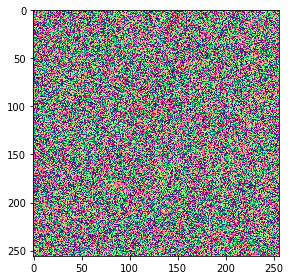

In [ ]:
plot(mesh)

In [ ]:
model = torchvision.models.vgg11(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg11-8a719046.pth" to /root/.cache/torch/hub/checkpoints/vgg11-8a719046.pth


  0%|          | 0.00/507M [00:00<?, ?B/s]

In [ ]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [ ]:
layer = model.features[3]

In [ ]:
idx = 2
weight = layer.weight[idx:idx+2, idx:idx+2]
weight.shape

torch.Size([2, 2, 3, 3])

In [ ]:
# layer = nn.Conv2d(in_channels=2, out_channels=2, kernel_size=(5, 5), stride=1, padding='same')

In [ ]:
nn.Conv2d??

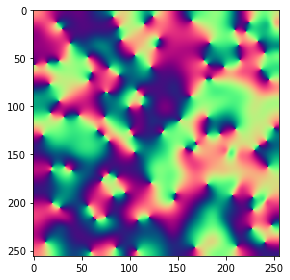

In [ ]:
x = mesh

for i in range(50):
    kernel_size = 5
    x = F.avg_pool2d(x, kernel_size=(kernel_size, kernel_size), stride=1, padding=kernel_size // 2)
    # x = F.conv2d(x.unsqueeze(0), weight, stride=1, padding='same')[0]
    x = F.normalize(x, p=2, dim=0)

plot(x)

---

In [ ]:
doge = 'https://static.wikia.nocookie.net/dogelore/images/9/97/Doge.jpg/revision/latest/scale-to-width-down/620?cb=20190205113053'
bliss = 'https://upload.wikimedia.org/wikipedia/en/2/27/Bliss_%28Windows_XP%29.png'
iliya = 'https://scontent.fsof8-1.fna.fbcdn.net/v/t1.6435-9/48398405_2218530618171041_6744355254776627200_n.jpg?_nc_cat=101&ccb=1-5&_nc_sid=174925&_nc_ohc=_nrIzJJm3JAAX8MtXOK&_nc_ht=scontent.fsof8-1.fna&oh=e252da5cf82fc07c73db7793e19ca8a1&oe=616F80FC'
tonka = 'https://scontent.fsof8-1.fna.fbcdn.net/v/t1.6435-9/240900528_10223248197011542_1569274760521175742_n.jpg?_nc_cat=104&ccb=1-5&_nc_sid=09cbfe&_nc_ohc=0JNtvhtRP44AX99jkAP&_nc_ht=scontent.fsof8-1.fna&oh=7f69fe6f851f5e6879a17e9cacf0bc53&oe=616CF8CA'

In [ ]:
from PIL import Image
import requests

url = tonka
im = Image.open(requests.get(url, stream=True).raw)
img = np.array(im)
img.max()

255

In [ ]:
DEVICE = 'cuda'

In [ ]:
model = torchvision.models.vgg11(pretrained=True).to(DEVICE)

In [ ]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [ ]:
from torchvision import transforms
from torch.autograd import Variable
from PIL import Image

mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

preprocess = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean, std)])

In [ ]:
def show_img(img):
    img = img[0].permute(1, 2, 0)
    img = img.detach().cpu().numpy()
    img = img * std.reshape((1, 1, 3)) + mean.reshape((1, 1, 3))
    plt.imshow(img)

def show_img_pil(img):
    img = img[0].permute(1, 2, 0)
    img = img.detach().cpu().numpy()
    img = img * std.reshape((1, 1, 3)) + mean.reshape((1, 1, 3))
    img = img.clip(0, 1)
    img = (img * 255).astype(np.uint8)
    return Image.fromarray(img)

In [ ]:
np.array([1,2,3]).astype

<function ndarray.astype>

tensor(-2.1179, device='cuda:0') tensor(2.6051, device='cuda:0') torch.Size([1, 3, 1072, 1067])
torch.Size([1, 3, 40, 40])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


  0%|          | 0/10 [00:00<?, ?it/s]

torch.Size([1, 3, 140, 140])


  0%|          | 0/10 [00:00<?, ?it/s]

torch.Size([1, 3, 240, 240])


  0%|          | 0/10 [00:00<?, ?it/s]

torch.Size([1, 3, 340, 340])


  0%|          | 0/10 [00:00<?, ?it/s]

torch.Size([1, 3, 440, 440])


  0%|          | 0/10 [00:00<?, ?it/s]

torch.Size([1, 3, 540, 540])


  0%|          | 0/10 [00:00<?, ?it/s]

torch.Size([1, 3, 640, 640])


  0%|          | 0/10 [00:00<?, ?it/s]

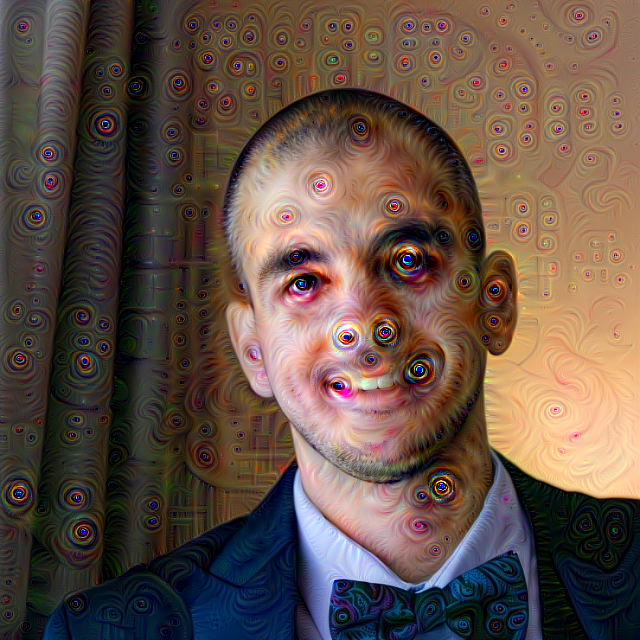

In [ ]:
o_inp = preprocess(im).unsqueeze(0).to(DEVICE)
detail = torch.zeros_like(o_inp, device=DEVICE)

print(o_inp.min(), o_inp.max(), o_inp.shape)

lr = 0.01

for z in range(7):
    size = 40 + z * 100
    iter_inp = F.interpolate(o_inp, size=size, mode='bilinear')
    detail = F.interpolate(detail, size=size, mode='bilinear')
    inp = Variable(iter_inp + detail, requires_grad=True)
    print(inp.shape)
    for i in tqdm(range(10)):
        model.features.zero_grad()
        out = model.features[:20 - int(z * 1.5)](inp)
        loss = torch.norm(out, 2)
        loss.backward()
        avg_grad = np.abs(inp.grad.data.cpu().numpy()).mean()
        norm_lr = lr / avg_grad
        inp.data += norm_lr * inp.grad.data
        inp.grad.data.zero_()

    detail = inp.data - iter_inp 

show_img_pil(inp)

tensor(-2.0494, device='cuda:0') tensor(2.5703, device='cuda:0') torch.Size([1, 3, 1440, 1440])
torch.Size([1, 3, 40, 40])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


  0%|          | 0/10 [00:00<?, ?it/s]

torch.Size([1, 3, 140, 140])


  0%|          | 0/10 [00:00<?, ?it/s]

torch.Size([1, 3, 240, 240])


  0%|          | 0/10 [00:00<?, ?it/s]

torch.Size([1, 3, 340, 340])


  0%|          | 0/10 [00:00<?, ?it/s]

torch.Size([1, 3, 440, 440])


  0%|          | 0/10 [00:00<?, ?it/s]

torch.Size([1, 3, 540, 540])


  0%|          | 0/10 [00:00<?, ?it/s]

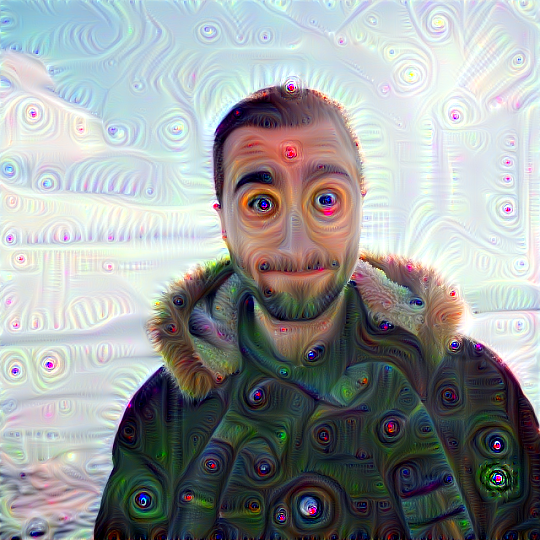

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


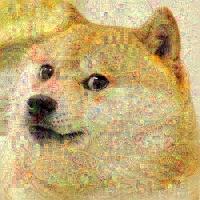

In [ ]:
zoomed = F.interpolate(inp, size=200, mode='bilinear')
show_img_pil(zoomed)

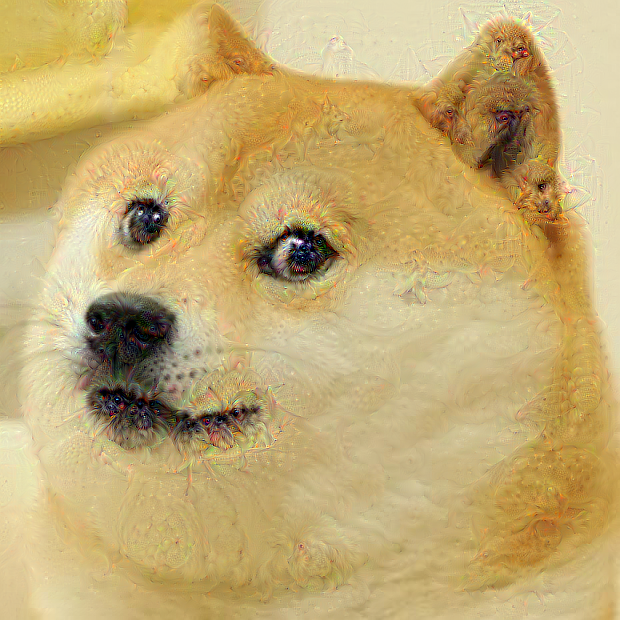

In [ ]:
show_img_pil(inp)

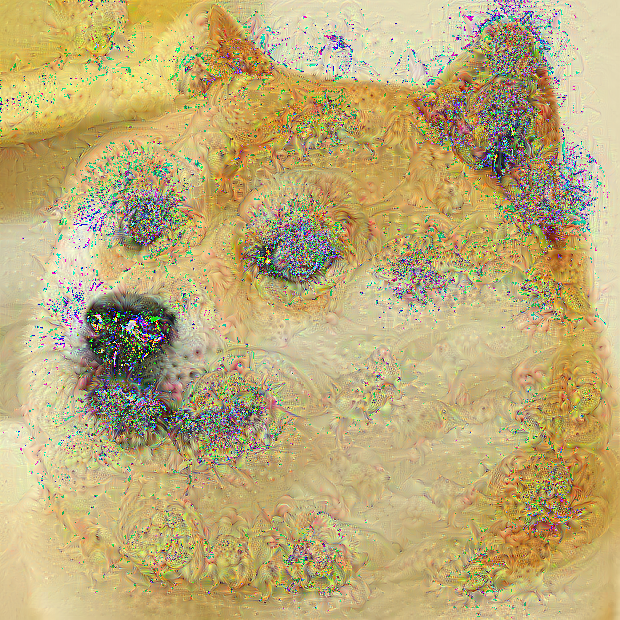

In [ ]:

show_img_pil(inp)

In [ ]:
inp.min()

tensor(-2.1064, device='cuda:0', grad_fn=<MinBackward1>)

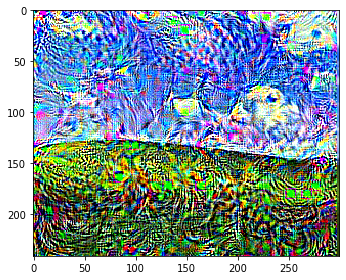

In [ ]:
show_img(inp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


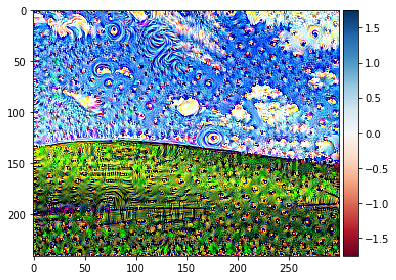

<function _VariableFunctionsClass.bmm>